In [56]:
# Data from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

import pandas as pd
import seaborn as sns
cancer = pd.read_csv('breast_cancer.csv').drop(columns='Unnamed: 32')
cancer.shape

C:\Users\wardy\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(569, 32)

In [57]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [58]:
len(cancer)==cancer.id.nunique()

True

In [59]:
cancer = cancer.set_index('id')
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

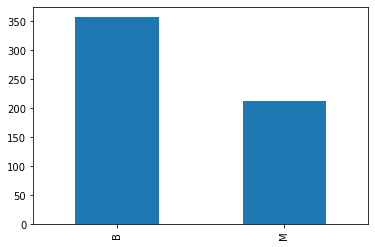

In [60]:
# Examining the class distribution - very important for classification
# This is a decent result - not perfectly balanced but not wildly imbalanced
cancer['diagnosis'].value_counts().plot.bar()

In [61]:
y = cancer['diagnosis'].map({'M':1, 'B':0})
y

id
842302      1
842517      1
84300903    1
84348301    1
84358402    1
           ..
926424      1
926682      1
926954      1
927241      1
92751       0
Name: diagnosis, Length: 569, dtype: int64

In [62]:
X = cancer.drop(columns='diagnosis')

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [64]:
from sklearn import ensemble
classifier = ensemble.RandomForestClassifier(n_estimators=1000)

In [65]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
classifier.predict_proba(X_test)

array([[0.965, 0.035],
       [0.   , 1.   ],
       [0.005, 0.995],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.002, 0.998],
       [0.001, 0.999],
       [0.095, 0.905],
       [0.268, 0.732],
       [0.951, 0.049],
       [0.935, 0.065],
       [0.015, 0.985],
       [0.912, 0.088],
       [0.154, 0.846],
       [0.979, 0.021],
       [0.015, 0.985],
       [0.943, 0.057],
       [0.994, 0.006],
       [0.998, 0.002],
       [0.   , 1.   ],
       [0.799, 0.201],
       [0.999, 0.001],
       [0.   , 1.   ],
       [0.997, 0.003],
       [0.989, 0.011],
       [0.923, 0.077],
       [0.993, 0.007],
       [0.942, 0.058],
       [1.   , 0.   ],
       [0.001, 0.999],
       [0.986, 0.014],
       [0.999, 0.001],
       [0.809, 0.191],
       [0.911, 0.089],
       [1.   , 0.   ],
       [0.998, 0.002],
       [0.324, 0.676],
       [0.945, 0.055],
       [0.   , 1.   ],
       [0.871, 0.129],
       [1.   , 0.   ],
       [0.016, 0.984],
       [0.999, 0.001],
       [1. 

In [70]:
predicted = classifier.predict(X_test)
actual = y_test

evaluate = pd.DataFrame({
    "actual": actual,
    "predicted": predicted
})

evaluate['correct'] = evaluate['actual'] == evaluate['predicted']
evaluate['correct'].mean()

0.9707602339181286

In [77]:
from sklearn import metrics
metrics.accuracy_score(y_test, predicted)

0.9707602339181286

In [89]:
# Reminder on definitions
# Sensitivity/recall – how good a test is at detecting the positives. 
# Specificity/precision – how many of the positively classified were relevant.

print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98       108
          1       0.98      0.94      0.96        63

avg / total       0.97      0.97      0.97       171

